In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
root = os.getcwd()
root 

'./fair_taucc'

In [3]:
dataset = "movielens-1m"
sensitive = "age"

In [4]:
df = pd.read_csv(root + f"/results/{dataset}/{sensitive}/taucc_fair/init_random/aggregated.csv")
df

,fair_major,fair_minor1,fair_minor2,tau_x_mean,tau_y_mean,NMI_true_labels_mean,AMI_true_labels_mean,ARI_true_labels_mean,NMI_rows_mean,AMI_rows_mean,...,NMI_rows_var,AMI_rows_var,ARI_rows_var,NMI_cols_var,AMI_cols_var,ARI_cols_var,balance_chierichetti_var,balance_bera_var,KL_fairness_error_var,time_var
0,0.0,0.0,0.0,0.116258,0.114772,0.120918,0.118960,0.103526,0.801951,0.801921,...,0.025013,0.025024,0.032593,0.017419,0.017431,0.019090,1.932550e-05,0.000266,0.000741,1650.615689
1,0.0,0.0,0.1,0.118688,0.117632,0.118502,0.116654,0.106534,0.873887,0.873869,...,0.010729,0.010734,0.010038,0.007690,0.007695,0.004564,1.808709e-05,0.000212,0.000183,377.920944
2,0.0,0.0,0.2,0.116377,0.114817,0.120032,0.118063,0.102959,0.816786,0.816758,...,0.030850,0.030862,0.036240,0.017601,0.017613,0.017816,1.354457e-05,0.000262,0.000823,221.765773
3,0.0,0.0,0.3,0.118447,0.117343,0.116887,0.115032,0.105000,0.844701,0.844679,...,0.015381,0.015387,0.015125,0.008317,0.008323,0.005398,1.840837e-05,0.000270,0.000316,597.385644
4,0.0,0.0,0.4,0.119874,0.119874,0.115009,0.113288,0.103001,0.897147,0.897135,...,0.000852,0.000852,0.000325,0.001222,0.001223,0.000509,1.252673e-05,0.000180,0.000024,277.404210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,1.0,1.0,0.6,0.054215,0.084525,0.125048,0.123105,0.104958,0.368217,0.368100,...,0.005472,0.005474,0.003491,0.012029,0.012039,0.014917,1.489436e-05,0.000202,0.000045,372.277567
1327,1.0,1.0,0.7,0.072381,0.083826,0.129475,0.127042,0.103129,0.303710,0.303581,...,0.003426,0.003427,0.002322,0.015995,0.016010,0.019234,7.379052e-09,0.000069,0.000005,593.435876
1328,1.0,1.0,0.8,0.045100,0.074539,0.137300,0.134410,0.121412,0.278037,0.277850,...,0.001349,0.001351,0.001572,0.013973,0.013989,0.019196,2.393001e-08,0.000977,0.000039,1778.845624
1329,1.0,1.0,0.9,0.044814,0.073546,0.144003,0.141134,0.125595,0.278297,0.278116,...,0.002910,0.002915,0.005275,0.013259,0.013275,0.021531,2.272252e-07,0.001785,0.000009,1878.105545


In [5]:
df_vanilla = pd.read_csv(root + f"/results/{dataset}/{sensitive}/taucc_vanilla/init_random/results_aggregated.csv")
df_vanilla

,tau_x_mean,tau_x_std,tau_x_var,tau_y_mean,tau_y_std,tau_y_var,NMI_mean,NMI_std,NMI_var,AMI_mean,...,balance_chierichetti_var,balance_bera_mean,balance_bera_std,balance_bera_var,KL_fairness_error_mean,KL_fairness_error_std,KL_fairness_error_var,time_mean,time_std,time_var
0,0.113785,0.008894,0.000079,0.110683,0.012225,0.000149,0.115085,0.011243,0.000126,0.112922,...,0.000584,0.786248,0.053321,0.002843,0.019257,0.009754,0.000095,3.617867,1.277285,1.631457


In [6]:
values = np.unique(df["fair_major"])
values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [7]:
def create_path(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [8]:
plot_path = root + f"/results/{dataset}/{sensitive}/plot"
create_path(plot_path)

## Plot of Fairness: Heatmap for Fairness

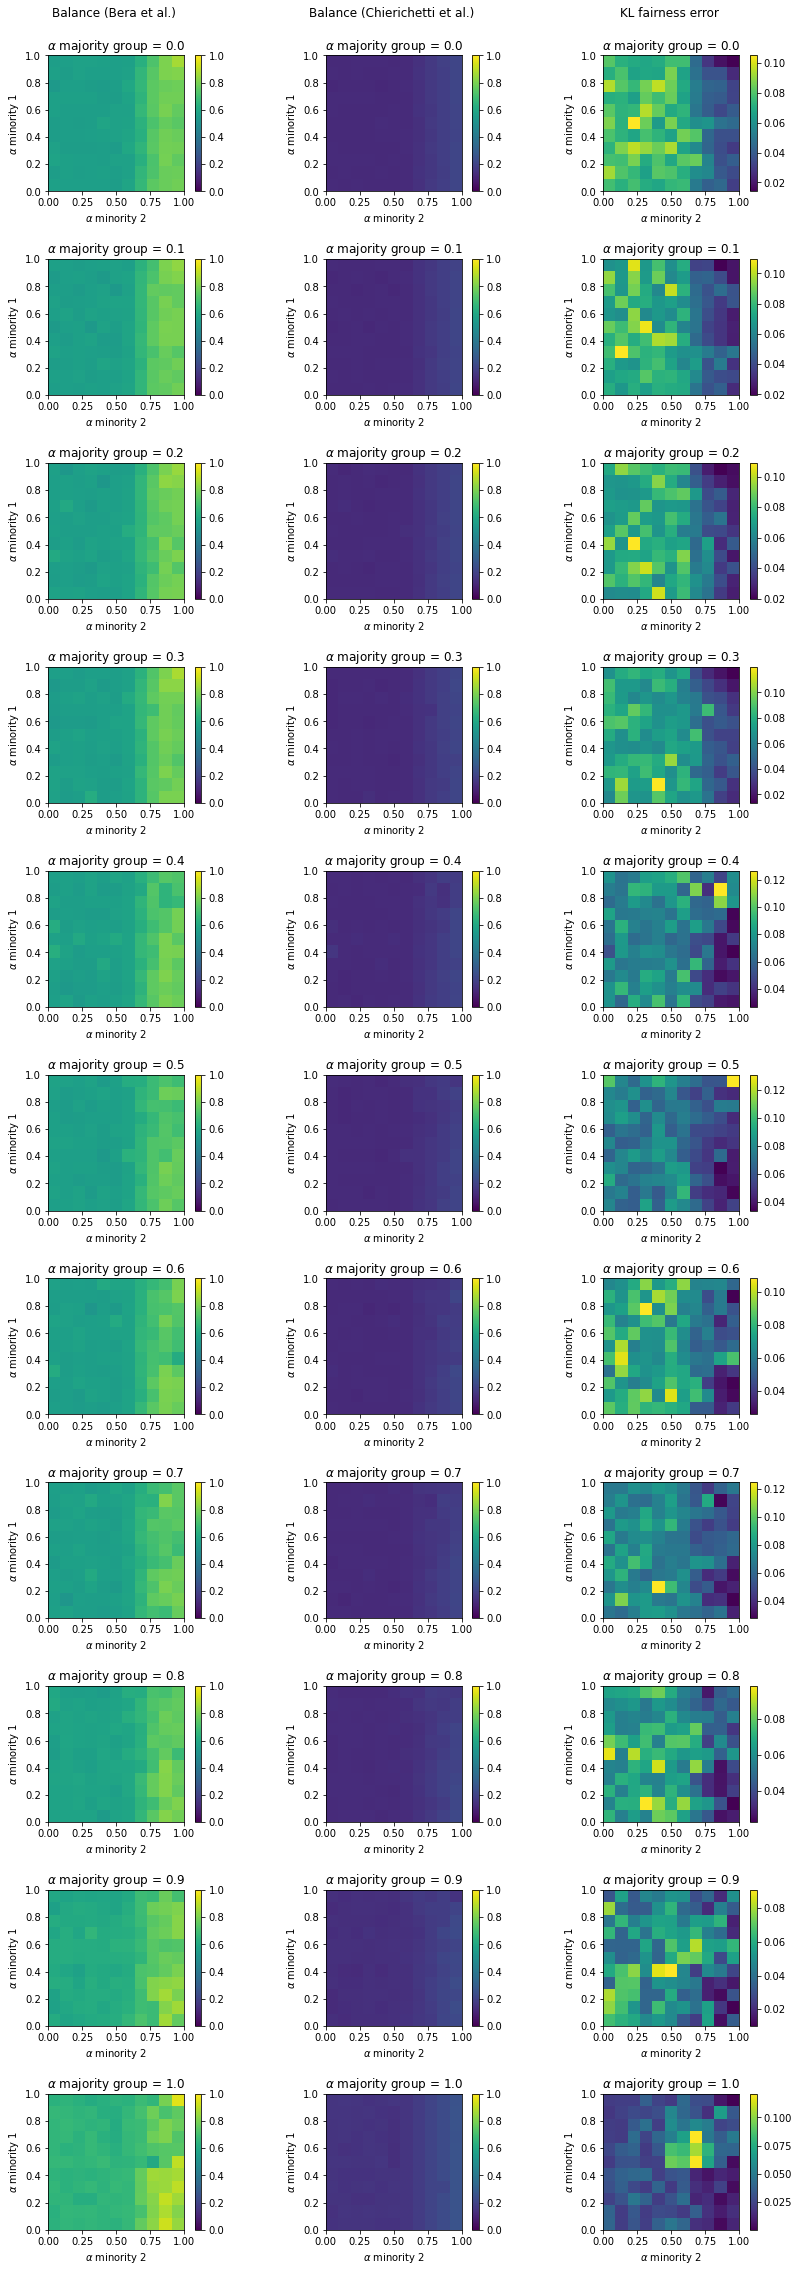

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

A, B = np.meshgrid(values, values)
fig = plt.figure(figsize=(12, 40))

for i, c in enumerate(values):
    temp = df[df["fair_major"] == c]
    temp = temp.sort_values(by=["fair_minor1", "fair_minor2"], ascending=[False, True])
    
    bera_pivot = temp.pivot_table(index='fair_minor1', columns='fair_minor2', values='balance_bera_mean', sort=False)
    bera = bera_pivot.to_numpy()
    
    ch_pivot = temp.pivot_table(index='fair_minor1', columns='fair_minor2', values='balance_chierichetti_mean', sort=False)
    ch = ch_pivot.to_numpy()
    
    kl_pivot = temp.pivot_table(index='fair_minor1', columns='fair_minor2', values='KL_fairness_error_mean', sort=False)
    kl = kl_pivot.to_numpy()
    
    ax1 = fig.add_subplot(11, 3, i*3+1)
    im1 = ax1.imshow(bera, cmap="viridis", vmin=0.0, vmax=1.0, extent=[values.min(), values.max(), values.min(), values.max()])
    ax1.set_xlim(0.0,1.0)
    ax1.set_ylim(0.0,1.0)
    title = ""
    if i == 0:
        title = "Balance (Bera et al.) \n\n"
    title += f"$\\alpha$ majority group = {c}"
    ax1.set_title(title)
    ax1.set_xlabel(r"$\alpha$ minority 2")
    ax1.set_ylabel(r"$\alpha$ minority 1")
    
    #cbar_ax1 = fig.add_axes([0.05 + (i*3+1)*0.25, 0.9, 0.02, 0.05])
    fig.colorbar(im1, orientation='vertical')
    #ax1.set_zlabel('bera')
    
    ax2 = fig.add_subplot(11, 3, i*3+2)
    im2 = ax2.imshow(ch, cmap="viridis", vmin=0.0, vmax=1.0, extent=[values.min(), values.max(), values.min(), values.max()])
    ax2.set_xlim(0.0,1.0)
    ax2.set_ylim(0.0,1.0)
    title = ""
    if i == 0:
        title = "Balance (Chierichetti et al.) \n\n"
    title += f"$\\alpha$ majority group = {c}"
    ax2.set_title(title)
    ax2.set_xlabel(r"$\alpha$ minority 2")
    ax2.set_ylabel(r"$\alpha$ minority 1")
    
    #cbar_ax2 = fig.add_axes([0.05 + (i*3+2)*0.25, 0.9, 0.02, 0.05])
    fig.colorbar(im2, orientation='vertical')
    #ax2.set_zlabel('chierichetti')
    
    ax3 = fig.add_subplot(11, 3, i*3+3)
    im3 = ax3.imshow(kl, cmap="viridis", extent=[values.min(), values.max(), values.min(), values.max()])
    ax3.set_xlim(0.0,1.0)
    ax3.set_ylim(0.0,1.0)
    title = ""
    if i == 0:
        title = "KL fairness error \n\n"
    title += f"$\\alpha$ majority group = {c}"
    ax3.set_title(title)
    #ax3.set_title(f"KL fairness error \n $\\alpha$ majority group = {c}")
    ax3.set_xlabel(r"$\alpha$ minority 2")
    ax3.set_ylabel(r"$\alpha$ minority 1")
    
    #cbar_ax3 = fig.add_axes([0.05 + (i*3+3)*0.25, 0.9, 0.02, 0.05])
    fig.colorbar(im3, orientation='vertical')
    #ax3.set_zlabel('KL fairness error')


plt.subplots_adjust(left=0.1, right=0.99, wspace=0.3, hspace=0.5)
plt.savefig(plot_path + f"/fairness.png")

#plt.suptitle("Balance (Bera et al.)", ha="center", va="top")
#plt.show()


## NMI, AMI, ARI w.r.t. true labels

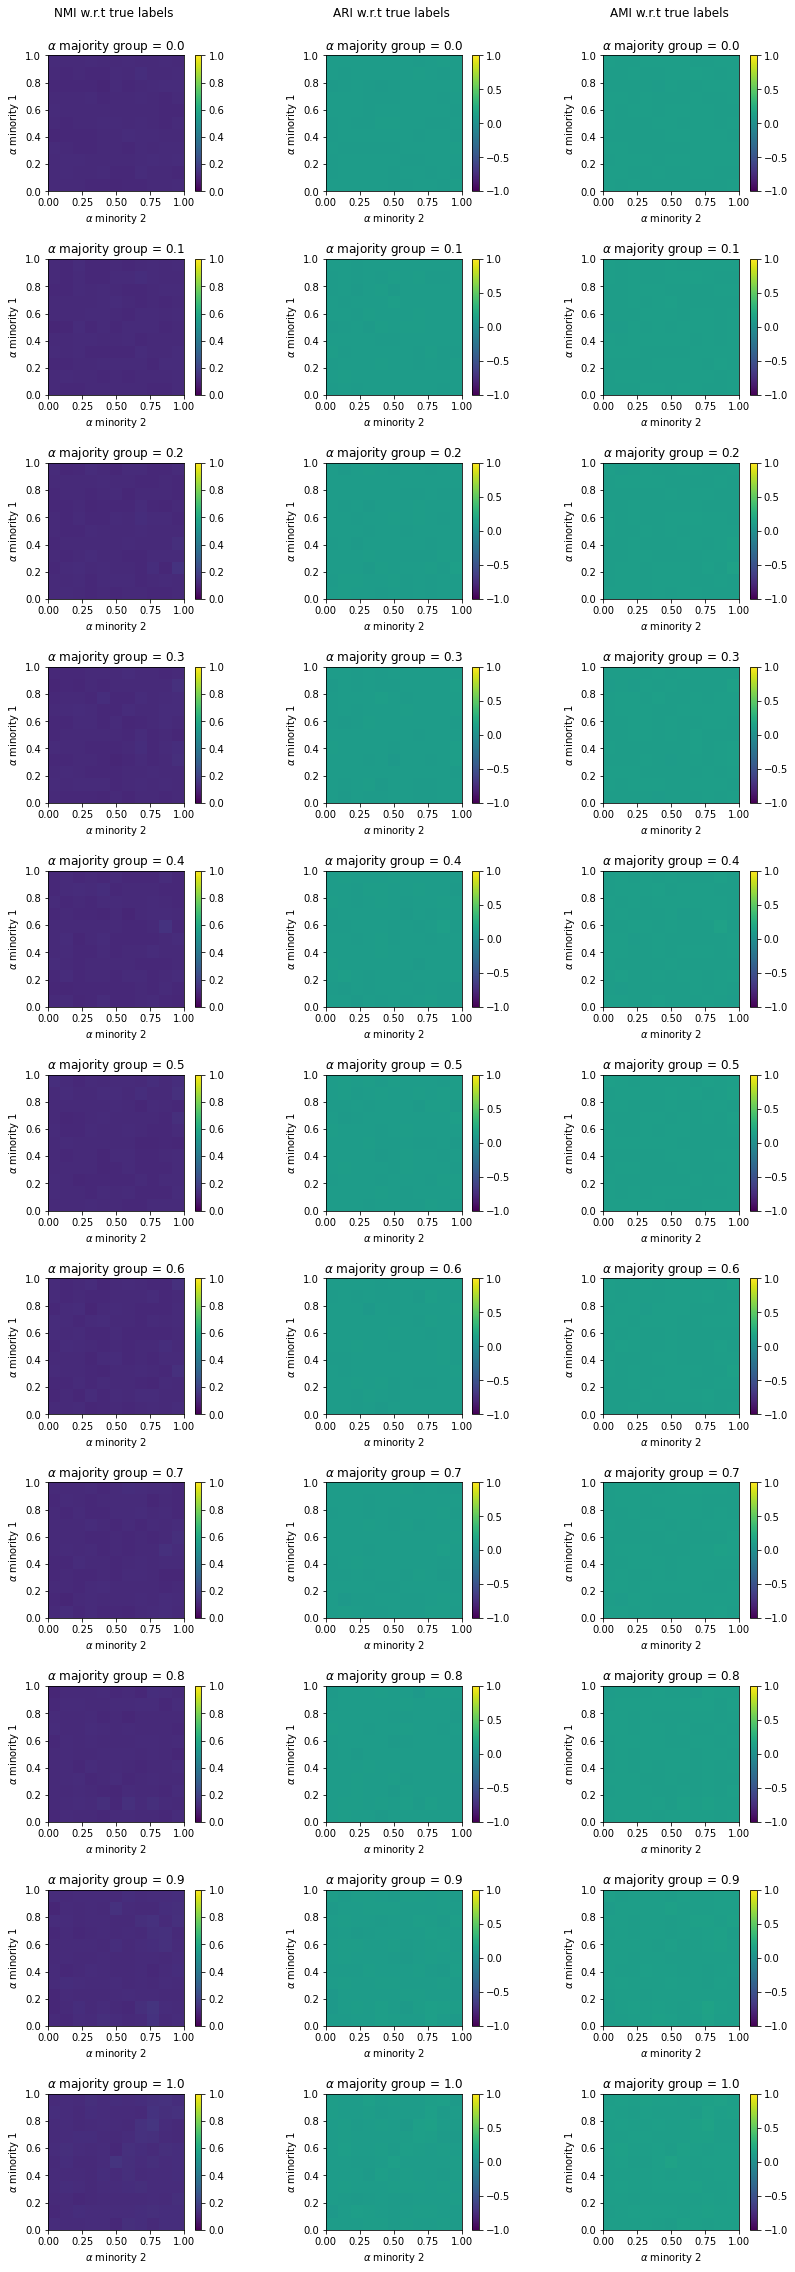

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

A, B = np.meshgrid(values, values)
fig = plt.figure(figsize=(12, 40))

for i, c in enumerate(values):
    temp = df[df["fair_major"] == c]
    temp = temp.sort_values(by=["fair_minor1", "fair_minor2"], ascending=[False, True])
    
    bera_pivot = temp.pivot_table(index='fair_minor1', columns='fair_minor2', values='NMI_true_labels_mean', sort=False)
    bera = bera_pivot.to_numpy()
    
    ch_pivot = temp.pivot_table(index='fair_minor1', columns='fair_minor2', values='ARI_true_labels_mean', sort=False)
    ch = ch_pivot.to_numpy()
    
    kl_pivot = temp.pivot_table(index='fair_minor1', columns='fair_minor2', values='AMI_true_labels_mean', sort=False)
    kl = kl_pivot.to_numpy()
    
    ax1 = fig.add_subplot(11, 3, i*3+1)
    im1 = ax1.imshow(bera, cmap="viridis", vmin=0.0, vmax=1.0, extent=[values.min(), values.max(), values.min(), values.max()])
    ax1.set_xlim(0.0,1.0)
    ax1.set_ylim(0.0,1.0)
    title = ""
    if i == 0:
        title = "NMI w.r.t true labels \n\n"
    title += f"$\\alpha$ majority group = {c}"
    ax1.set_title(title)
    ax1.set_xlabel(r"$\alpha$ minority 2")
    ax1.set_ylabel(r"$\alpha$ minority 1")
    
    #cbar_ax1 = fig.add_axes([0.05 + (i*3+1)*0.25, 0.9, 0.02, 0.05])
    fig.colorbar(im1, orientation='vertical')
    #ax1.set_zlabel('bera')
    
    ax2 = fig.add_subplot(11, 3, i*3+2)
    im2 = ax2.imshow(ch, cmap="viridis", vmin=-1.0, vmax=1.0, extent=[values.min(), values.max(), values.min(), values.max()])
    ax2.set_xlim(0.0,1.0)
    ax2.set_ylim(0.0,1.0)
    title = ""
    if i == 0:
        title = "ARI w.r.t true labels \n\n"
    title += f"$\\alpha$ majority group = {c}"
    ax2.set_title(title)
    ax2.set_xlabel(r"$\alpha$ minority 2")
    ax2.set_ylabel(r"$\alpha$ minority 1")
    
    #cbar_ax2 = fig.add_axes([0.05 + (i*3+2)*0.25, 0.9, 0.02, 0.05])
    fig.colorbar(im2, orientation='vertical')
    #ax2.set_zlabel('chierichetti')
    
    ax3 = fig.add_subplot(11, 3, i*3+3)
    im3 = ax3.imshow(kl, cmap="viridis", vmin=-1.0, vmax=1.0, extent=[values.min(), values.max(), values.min(), values.max()])
    ax3.set_xlim(0.0,1.0)
    ax3.set_ylim(0.0,1.0)
    title = ""
    if i == 0:
        title = "AMI w.r.t true labels \n\n"
    title += f"$\\alpha$ majority group = {c}"
    ax3.set_title(title)
    #ax3.set_title(f"KL fairness error \n $\\alpha$ majority group = {c}")
    ax3.set_xlabel(r"$\alpha$ minority 2")
    ax3.set_ylabel(r"$\alpha$ minority 1")
    
    #cbar_ax3 = fig.add_axes([0.05 + (i*3+3)*0.25, 0.9, 0.02, 0.05])
    fig.colorbar(im3, orientation='vertical')
    #ax3.set_zlabel('KL fairness error')


plt.subplots_adjust(left=0.1, right=0.99, wspace=0.3, hspace=0.5)
plt.savefig(plot_path + f"/quality_true_labels.png")

#plt.suptitle("Balance (Bera et al.)", ha="center", va="top")
#plt.show()


## NMI, AMI, ARI w.r.t. rows

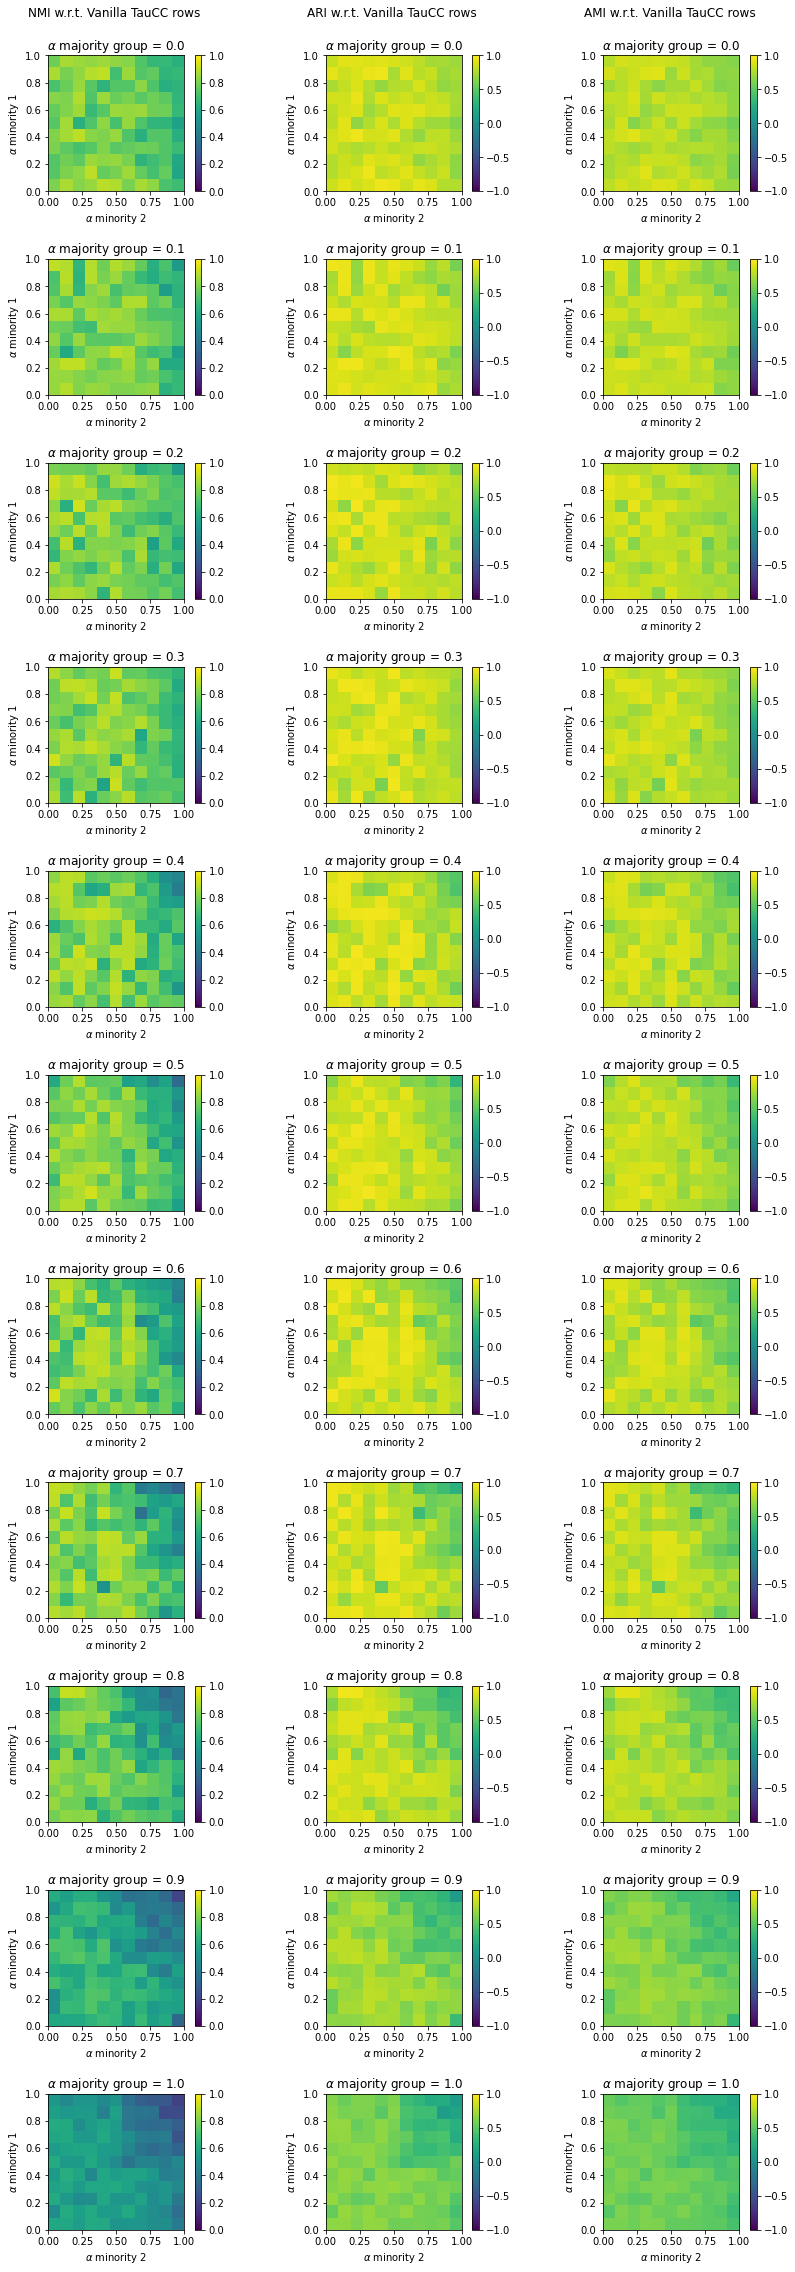

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

A, B = np.meshgrid(values, values)
fig = plt.figure(figsize=(12, 40))

for i, c in enumerate(values):
    temp = df[df["fair_major"] == c]
    temp = temp.sort_values(by=["fair_minor1", "fair_minor2"], ascending=[False, True])
    
    bera_pivot = temp.pivot_table(index='fair_minor1', columns='fair_minor2', values='NMI_rows_mean', sort=False)
    bera = bera_pivot.to_numpy()
    
    ch_pivot = temp.pivot_table(index='fair_minor1', columns='fair_minor2', values='ARI_rows_mean', sort=False)
    ch = ch_pivot.to_numpy()
    
    kl_pivot = temp.pivot_table(index='fair_minor1', columns='fair_minor2', values='AMI_rows_mean', sort=False)
    kl = kl_pivot.to_numpy()
    
    ax1 = fig.add_subplot(11, 3, i*3+1)
    im1 = ax1.imshow(bera, cmap="viridis", vmin=0.0, vmax=1.0, extent=[values.min(), values.max(), values.min(), values.max()])
    ax1.set_xlim(0.0,1.0)
    ax1.set_ylim(0.0,1.0)
    title = ""
    if i == 0:
        title = "NMI w.r.t. Vanilla TauCC rows \n\n"
    title += f"$\\alpha$ majority group = {c}"
    ax1.set_title(title)
    ax1.set_xlabel(r"$\alpha$ minority 2")
    ax1.set_ylabel(r"$\alpha$ minority 1")
    
    #cbar_ax1 = fig.add_axes([0.05 + (i*3+1)*0.25, 0.9, 0.02, 0.05])
    fig.colorbar(im1, orientation='vertical')
    #ax1.set_zlabel('bera')
    
    ax2 = fig.add_subplot(11, 3, i*3+2)
    im2 = ax2.imshow(ch, cmap="viridis", vmin=-1.0, vmax=1.0, extent=[values.min(), values.max(), values.min(), values.max()])
    ax2.set_xlim(0.0,1.0)
    ax2.set_ylim(0.0,1.0)
    title = ""
    if i == 0:
        title = "ARI w.r.t. Vanilla TauCC rows \n\n"
    title += f"$\\alpha$ majority group = {c}"
    ax2.set_title(title)
    ax2.set_xlabel(r"$\alpha$ minority 2")
    ax2.set_ylabel(r"$\alpha$ minority 1")
    
    #cbar_ax2 = fig.add_axes([0.05 + (i*3+2)*0.25, 0.9, 0.02, 0.05])
    fig.colorbar(im2, orientation='vertical')
    #ax2.set_zlabel('chierichetti')
    
    ax3 = fig.add_subplot(11, 3, i*3+3)
    im3 = ax3.imshow(kl, cmap="viridis", vmin=-1.0, vmax=1.0, extent=[values.min(), values.max(), values.min(), values.max()])
    ax3.set_xlim(0.0,1.0)
    ax3.set_ylim(0.0,1.0)
    title = ""
    if i == 0:
        title = "AMI w.r.t. Vanilla TauCC rows \n\n"
    title += f"$\\alpha$ majority group = {c}"
    ax3.set_title(title)
    #ax3.set_title(f"KL fairness error \n $\\alpha$ majority group = {c}")
    ax3.set_xlabel(r"$\alpha$ minority 2")
    ax3.set_ylabel(r"$\alpha$ minority 1")
    
    #cbar_ax3 = fig.add_axes([0.05 + (i*3+3)*0.25, 0.9, 0.02, 0.05])
    fig.colorbar(im3, orientation='vertical')
    #ax3.set_zlabel('KL fairness error')


plt.subplots_adjust(left=0.1, right=0.99, wspace=0.3, hspace=0.5)
plt.savefig(plot_path + f"/quality_rows.png")

#plt.suptitle("Balance (Bera et al.)", ha="center", va="top")
#plt.show()


## NMI, AMI, ARI w.r.t. cols

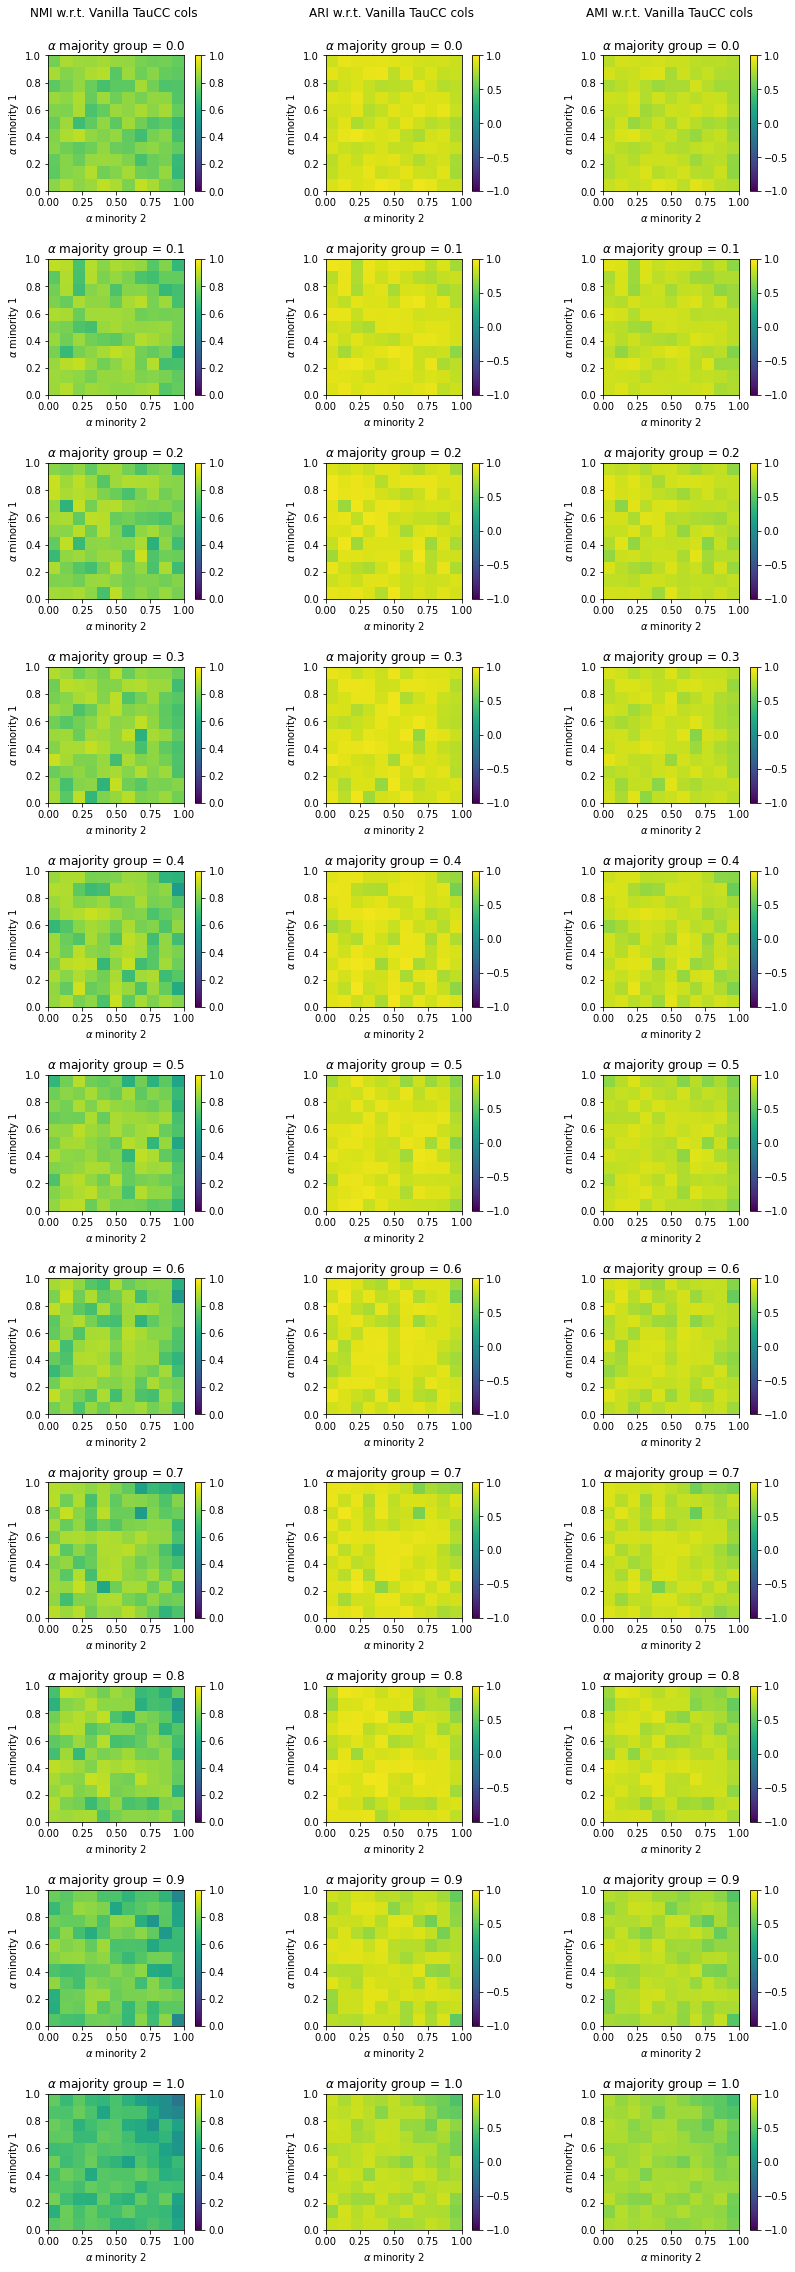

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

A, B = np.meshgrid(values, values)
fig = plt.figure(figsize=(12, 40))

for i, c in enumerate(values):
    temp = df[df["fair_major"] == c]
    temp = temp.sort_values(by=["fair_minor1", "fair_minor2"], ascending=[False, True])
    
    bera_pivot = temp.pivot_table(index='fair_minor1', columns='fair_minor2', values='NMI_cols_mean', sort=False)
    bera = bera_pivot.to_numpy()
    
    ch_pivot = temp.pivot_table(index='fair_minor1', columns='fair_minor2', values='ARI_cols_mean', sort=False)
    ch = ch_pivot.to_numpy()
    
    kl_pivot = temp.pivot_table(index='fair_minor1', columns='fair_minor2', values='AMI_cols_mean', sort=False)
    kl = kl_pivot.to_numpy()
    
    ax1 = fig.add_subplot(11, 3, i*3+1)
    im1 = ax1.imshow(bera, cmap="viridis", vmin=0.0, vmax=1.0, extent=[values.min(), values.max(), values.min(), values.max()])
    ax1.set_xlim(0.0,1.0)
    ax1.set_ylim(0.0,1.0)
    title = ""
    if i == 0:
        title = "NMI w.r.t. Vanilla TauCC cols \n\n"
    title += f"$\\alpha$ majority group = {c}"
    ax1.set_title(title)
    ax1.set_xlabel(r"$\alpha$ minority 2")
    ax1.set_ylabel(r"$\alpha$ minority 1")
    
    #cbar_ax1 = fig.add_axes([0.05 + (i*3+1)*0.25, 0.9, 0.02, 0.05])
    fig.colorbar(im1, orientation='vertical')
    #ax1.set_zlabel('bera')
    
    ax2 = fig.add_subplot(11, 3, i*3+2)
    im2 = ax2.imshow(ch, cmap="viridis", vmin=-1.0, vmax=1.0, extent=[values.min(), values.max(), values.min(), values.max()])
    ax2.set_xlim(0.0,1.0)
    ax2.set_ylim(0.0,1.0)
    title = ""
    if i == 0:
        title = "ARI w.r.t. Vanilla TauCC cols \n\n"
    title += f"$\\alpha$ majority group = {c}"
    ax2.set_title(title)
    ax2.set_xlabel(r"$\alpha$ minority 2")
    ax2.set_ylabel(r"$\alpha$ minority 1")
    
    #cbar_ax2 = fig.add_axes([0.05 + (i*3+2)*0.25, 0.9, 0.02, 0.05])
    fig.colorbar(im2, orientation='vertical')
    #ax2.set_zlabel('chierichetti')
    
    ax3 = fig.add_subplot(11, 3, i*3+3)
    im3 = ax3.imshow(kl, cmap="viridis", vmin=-1.0, vmax=1.0, extent=[values.min(), values.max(), values.min(), values.max()])
    ax3.set_xlim(0.0,1.0)
    ax3.set_ylim(0.0,1.0)
    title = ""
    if i == 0:
        title = "AMI w.r.t. Vanilla TauCC cols \n\n"
    title += f"$\\alpha$ majority group = {c}"
    ax3.set_title(title)
    #ax3.set_title(f"KL fairness error \n $\\alpha$ majority group = {c}")
    ax3.set_xlabel(r"$\alpha$ minority 2")
    ax3.set_ylabel(r"$\alpha$ minority 1")
    
    #cbar_ax3 = fig.add_axes([0.05 + (i*3+3)*0.25, 0.9, 0.02, 0.05])
    fig.colorbar(im3, orientation='vertical')
    #ax3.set_zlabel('KL fairness error')


plt.subplots_adjust(left=0.1, right=0.99, wspace=0.3, hspace=0.5)
plt.savefig(plot_path + f"/quality_cols.png")

#plt.suptitle("Balance (Bera et al.)", ha="center", va="top")
#plt.show()
